# Análisis y Limpieza de URLs Legítimas - Sector Banca

Este notebook contiene el análisis exploratorio y la limpieza inicial del dataset consolidado de URLs legítimas del sector banca.

## Objetivos

- Evaluar la calidad y cantidad de los datos unificados a partir de tres fuentes diferentes.  
- Identificar valores nulos, duplicados y otras inconsistencias en las columnas principales.  
- Filtrar las filas sin URLs válidas para asegurar un dataset limpio y útil para modelado.  
- Documentar cada paso del proceso para facilitar la comprensión y reproducibilidad.  

## Descripción del dataset

El dataset contiene URLs legítimas relacionadas con bancos españoles, con información adicional como:  
- Nombre del banco (`banco`).  
- Dominio principal (`dominio_principal`).  
- URL relevante detectada (`url_relevante`).  
- Fuente de la URL (`fuente`).  
- Tipo de página normalizada (`tipo_pagina_normalizada`).  
- URL capturada (`url`).  

Este análisis se centrará principalmente en la columna `url`, que contiene la mayoría de las URLs útiles para el proyecto.


# Checklist Análisis Dataset URLs Legítimas - Banca

- [x] Unificar los CSV del sector banca en un solo archivo  
- [x] Verificar número total de filas y columnas del dataset unificado  
- [x] Revisar duplicados totales y porcentaje sobre el total  
- [x] Comprobar valores nulos en cada columna  
- [x] Confirmar que la columna `url` contiene la mayoría de URLs útiles  
- [x] Filtrar filas con valores nulos en la columna `url`  
- [x] Validar formato y sintaxis de las URLs en la columna `url`  
- [x] Analizar distribución de URLs por banco para asegurar diversidad  
- [x] Documentar resultados del análisis y decisiones tomadas  
- [x] Preparar dataset limpio para entrenamiento de modelos  
- [x] Guardar copia del dataset limpio y documentado  


# Carga e inspección inicial del dataset unificado de URLs legítimas - Banca

En esta celda realizamos la carga del archivo CSV que contiene el dataset unificado de URLs legítimas del sector banca.

Posteriormente, hacemos una inspección básica para entender la estructura y calidad de los datos:

- Se imprime la información general del DataFrame (`info()`), mostrando el número de filas, columnas y tipos de datos, además de los valores no nulos por columna.  
- Se calcula y muestra el total de filas y el número de filas duplicadas, con su porcentaje sobre el total, para evaluar si existen duplicados que deban limpiarse.  
- Se analiza la cantidad de valores nulos en cada columna para detectar posibles problemas de datos incompletos.  
- Finalmente, se muestran las primeras filas del DataFrame para una inspección visual rápida y comprensión de las columnas y datos.

Este paso es fundamental para conocer la calidad de los datos antes de proceder a la limpieza y análisis más profundo.


In [1]:
import pandas as pd
import os

# Ruta local donde tienes los datos en crudo
base_path = '/Users/test/Desktop/phishing-detector/data/raw/legitimas'

# Nombre del archivo unificado de banca
archivo_banca = 'banca_legitimas_unificado.csv'

# Ruta completa al archivo
ruta_archivo = os.path.join(base_path, archivo_banca)

# Cargar CSV
df_banca = pd.read_csv(ruta_archivo)

# Información general del DataFrame
print("Información del DataFrame:")
print(df_banca.info())

# Conteo total y duplicados
total_filas = len(df_banca)
duplicados = df_banca.duplicated().sum()
print(f"\nTotal filas: {total_filas}")
print(f"Duplicados: {duplicados} ({(duplicados / total_filas) * 100:.2f}%)")

# Valores nulos por columna
print("\nValores nulos por columna:")
print(df_banca.isnull().sum())

# Mostrar primeras filas para inspección visual
print("\nPrimeras filas del DataFrame:")
display(df_banca.head())


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1242 entries, 0 to 1241
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   banco                    1242 non-null   object
 1   dominio_principal        113 non-null    object
 2   url_relevante            113 non-null    object
 3   fuente                   113 non-null    object
 4   tipo_pagina_normalizada  101 non-null    object
 5   url                      1129 non-null   object
dtypes: object(6)
memory usage: 58.3+ KB
None

Total filas: 1242
Duplicados: 0 (0.00%)

Valores nulos por columna:
banco                         0
dominio_principal          1129
url_relevante              1129
fuente                     1129
tipo_pagina_normalizada    1141
url                         113
dtype: int64

Primeras filas del DataFrame:


,banco,dominio_principal,url_relevante,fuente,tipo_pagina_normalizada,url
0,BBVA,bbva.es,https://www.bbva.es/general/login/login-empresas,Navegación web,login,NaN
1,BBVA,bbva.es,https://movil.bbva.es,Navegación web,NaN,NaN
2,BBVA,bbva.es,https://affinitycard.movil.bbva.es,Navegación web,NaN,NaN
3,BBVA,bbva.es,https://empresas.bbva.es/bbva-btge-login-solution,Navegación web,login,NaN
4,BBVA,bbva.es,https://empresas.bbva.es/apnc,Navegación web,empresas,NaN


# Filtrado de filas con URLs válidas

En esta celda filtramos el DataFrame para quedarnos únicamente con las filas que contienen una URL válida en la columna `url`.

Usamos el método `.notna()` de pandas para seleccionar solo aquellas filas donde el valor en `url` **no es nulo**. Esto es importante para evitar errores o datos incompletos durante el análisis y el entrenamiento del modelo.

Luego, creamos una copia del DataFrame filtrado para trabajar de forma segura sin afectar al DataFrame original.

Finalmente, imprimimos el número de filas resultantes tras el filtrado para verificar cuántos registros útiles nos quedan.


In [2]:
# Filtrar filas con URL no nula
df_banca_limpio = df_banca[df_banca['url'].notna()].copy()

print(f"Filas tras filtrar URLs nulas: {len(df_banca_limpio)}")


Filas tras filtrar URLs nulas: 1129


# Validación de formato y sintaxis de URLs en la columna `url`

En esta celda validamos que las URLs contenidas en la columna `url` estén bien formadas y sean sintácticamente correctas.

Para ello, utilizamos la librería `validators` que proporciona una función para verificar la validez de URLs.

- Creamos una nueva columna `url_valida` que indica con `True` o `False` si la URL es válida.  
- Calculamos y mostramos la cantidad y porcentaje de URLs válidas e inválidas en el dataset.  
- Finalmente, mostramos algunos ejemplos de URLs inválidas para que puedan ser revisadas manualmente.

Este paso es fundamental para asegurar que el dataset que alimentará el modelo contiene URLs con formato correcto y evitar errores posteriores en el procesamiento o análisis.


In [6]:
import validators

# Función para validar URLs
def es_url_valida(url):
    if pd.isna(url):
        return False
    return validators.url(url)

# Crear columna nueva con validación
df_banca_limpio['url_valida'] = df_banca_limpio['url'].apply(es_url_valida)

# Resumen validación
total_urls = len(df_banca_limpio)
urls_validas = df_banca_limpio['url_valida'].sum()
urls_invalidas = total_urls - urls_validas

print(f"Total URLs: {total_urls}")
print(f"URLs válidas: {urls_validas} ({urls_validas / total_urls * 100:.2f}%)")
print(f"URLs inválidas: {urls_invalidas} ({urls_invalidas / total_urls * 100:.2f}%)")

# Mostrar ejemplos de URLs inválidas
print("\nEjemplos de URLs inválidas:")
print(df_banca_limpio.loc[~df_banca_limpio['url_valida'], 'url'].head(10))


Total URLs: 1129
URLs válidas: 1129 (100.00%)
URLs inválidas: 0 (0.00%)

Ejemplos de URLs inválidas:
Series([], Name: url, dtype: object)


Distribución de URLs incluyendo bancos no representados:
banco
BANCO DE ESPAÑA    671
BANCA MARCH         85
CAIXABANK            3
UNICAJA BANCO       35
IBERCAJA            74
ABANCA              47
KUTXABANK            4
CAJAMAR            118
CAJA RURAL          60
OPENBANK            32
BBVA                 0
SANTANDER            0
BANKIA               0
SABADELL             0
BANKINTER            0
UNICJA               0
LIBERBANK            0
ING                  0
EVO BANCO            0
BANCO POPULAR        0
Name: count, dtype: int64


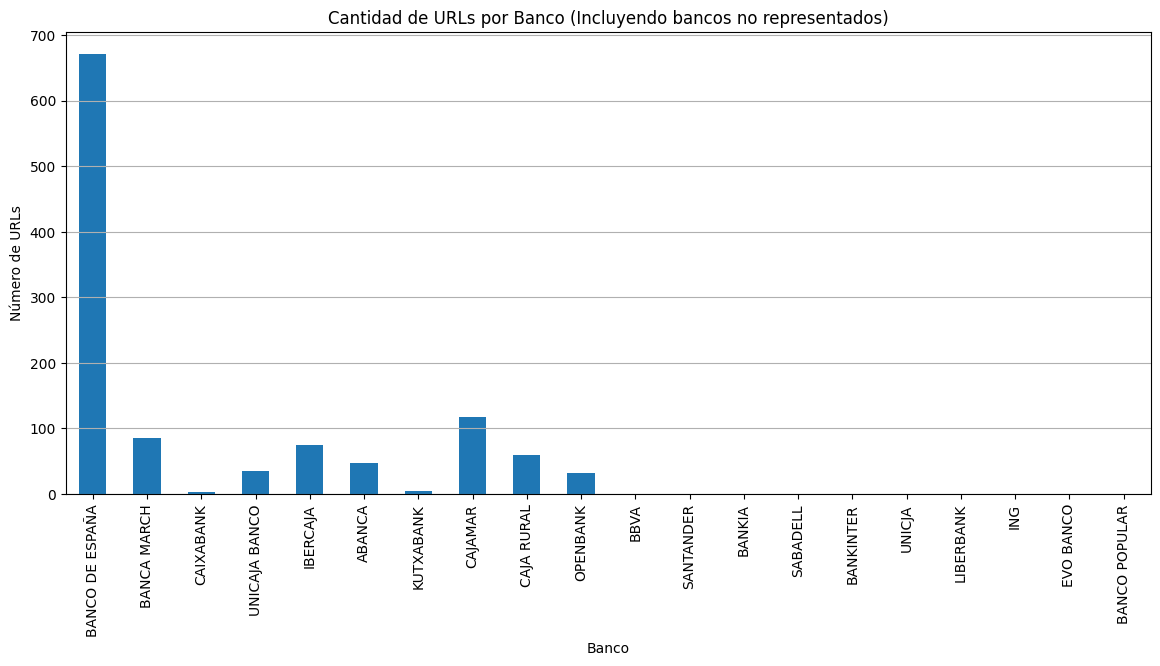

In [13]:
import matplotlib.pyplot as plt


# Lista completa de bancos objetivo 
bancos_objetivo = [
    'BANCO DE ESPAÑA', 'BANCA MARCH', 'CAIXABANK', 'UNICAJA BANCO', 'IBERCAJA',
    'ABANCA', 'KUTXABANK', 'CAJAMAR', 'CAJA RURAL', 'OPENBANK', 
    'BBVA', 'SANTANDER', 'BANKIA', 'SABADELL', 'BANKINTER', 'UNICJA', 'LIBERBANK', 'ING', 'EVO BANCO', 'BANCO POPULAR'
]

# Normalizamos la lista para asegurar coincidencias
bancos_objetivo = [b.upper() for b in bancos_objetivo]

# Contamos URLs por banco en el dataset (también normalizado)
df_banca_limpio['banco'] = df_banca_limpio['banco'].str.upper().str.strip()
urls_por_banco = df_banca_limpio['banco'].value_counts()

# Reindexamos para que aparezcan todos los bancos, rellenando con 0 donde no haya datos
urls_por_banco = urls_por_banco.reindex(bancos_objetivo, fill_value=0)

print("Distribución de URLs incluyendo bancos no representados:")
print(urls_por_banco)

# Graficar distribución completa
plt.figure(figsize=(14,6))
urls_por_banco.plot(kind='bar')
plt.title('Cantidad de URLs por Banco (Incluyendo bancos no representados)')
plt.xlabel('Banco')
plt.ylabel('Número de URLs')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


## Resumen de Distribución y Plan de Recolección para Bancos No Representados

En el análisis de la distribución de URLs legítimas por banco, se ha detectado que algunos bancos importantes no están representados en el dataset actual. Estos bancos son:

- BBVA  
- Santander  
- Bankia  
- Sabadell  
- Bankinter  
- Unicja  
- Liberbank  
- ING  
- EVO Banco  
- Banco Popular  

Para garantizar una representación adecuada y evitar sesgos en los modelos de detección de phishing, se planifica obtener URLs adicionales para estos bancos mediante técnicas avanzadas de recolección:

- **Selenium:** para interactuar con páginas web que cargan contenido dinámicamente o requieren acciones del usuario.  
- **Crawling profundo:** para explorar múltiples niveles internos de los sitios web y extraer URLs relevantes que no aparecen en un scraping básico.

Esta estrategia permitirá ampliar el dataset con URLs legítimas de alta calidad, mejorando la diversidad y cobertura del conjunto de datos para el entrenamiento y validación de modelos.


In [16]:
# Seleccionar columnas relevantes para el modelo
columnas_relevantes = ['banco', 'url']

# Crear DataFrame limpio con solo las columnas seleccionadas
df_modelo = df_banca_limpio[columnas_relevantes].copy()

# Eliminar filas duplicadas basadas en las columnas seleccionadas
df_modelo = df_modelo.drop_duplicates()

print(f"Filas después de limpiar duplicados en columnas relevantes: {len(df_modelo)}")

# Construir ruta para guardar en /data/processed/legitimas/
ruta_guardado = '/Users/test/Desktop/phishing-detector/data/processed/legitimas/banca_legitimas_limpio.csv'


# Guardar CSV sin índice
df_modelo.to_csv(ruta_guardado, index=False)

print(f"Dataset limpio guardado en: {ruta_guardado}")

Filas después de limpiar duplicados en columnas relevantes: 1129
Dataset limpio guardado en: /Users/test/Desktop/phishing-detector/data/processed/legitimas/banca_legitimas_limpio.csv
